<a href="https://colab.research.google.com/github/Lambru99/Fashion_MNIST_CNN/blob/main/Definitivo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape le immagini in modo da avere una dimensione aggiuntiva per il canale di colore (in questo caso 1, scala di grigi)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converti le etichette in formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [3]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

CNN

In [4]:
model = tf.keras.Sequential()

# Convolutional layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1), name='conv1'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool1'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout1'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='conv2'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool2'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout2'))

# Flatten and dense layers
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(256, activation='relu', name='dense1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout3'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense2'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 dropout1 (Dropout)          (None, 14, 14, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        8224      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 dropout2 (Dropout)          (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
cnn_results = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 21s 9ms/step - loss: 0.5861 - accuracy: 0.7827 - val_loss: 0.3919 - val_accuracy: 0.8591
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4191 - accuracy: 0.8506 - val_loss: 0.3263 - val_accuracy: 0.8823
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3689 - accuracy: 0.8651 - val_loss: 0.3025 - val_accuracy: 0.8899
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3379 - accuracy: 0.8765 - val_loss: 0.2757 - val_accuracy: 0.8978
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3170 - accuracy: 0.8830 - val_loss: 0.2662 - val_accuracy: 0.9009
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3018 - accuracy: 0.8886 - val_loss: 0.2573 - val_accuracy: 0.9056
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2920 - accuracy: 0.8931 - val_loss: 0.2554 - val_accurac

In [8]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9061999917030334


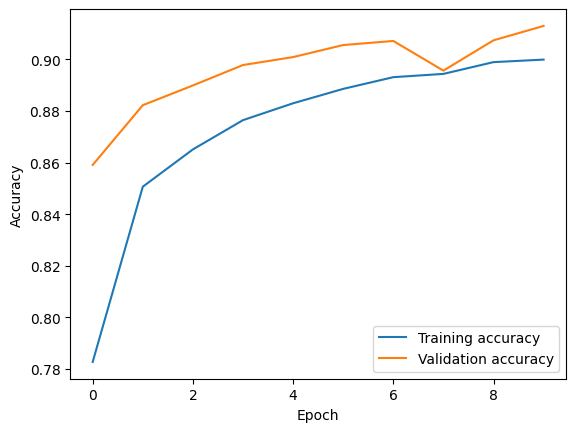

In [9]:
# Get training and validation accuracy
train_acc = cnn_results.history['accuracy']
val_acc = cnn_results.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


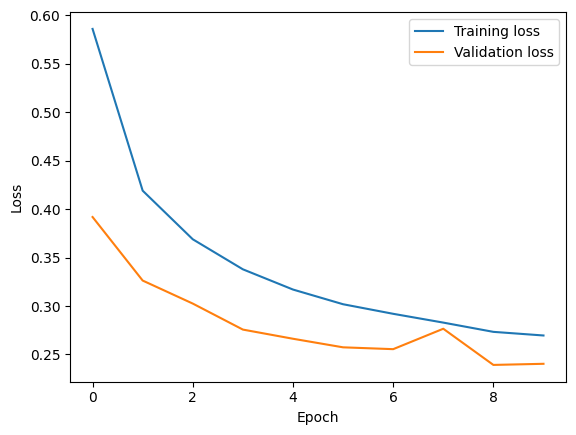

In [10]:
# Get training and validation loss
train_loss = cnn_results.history['loss']
val_loss = cnn_results.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## confusion matrix

313/313 [==============================] - 1s 2ms/step


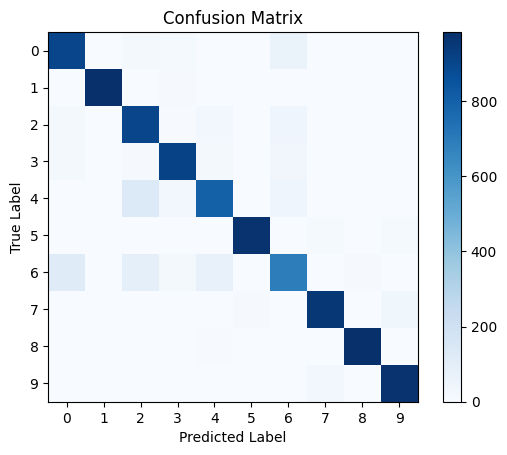

[[901   0  16  14   3   1  62   0   3   0]
 [  1 984   0   9   1   0   3   0   2   0]
 [ 17   1 903   7  30   0  42   0   0   0]
 [ 22   3  10 912  20   0  31   0   2   0]
 [  0   0 131  27 796   0  46   0   0   0]
 [  0   0   0   0   0 972   0  14   0  14]
 [117   2  89  23  71   0 690   0   8   0]
 [  0   0   0   0   0   8   0 956   0  36]
 [  2   3   2   2   4   1   3   3 979   1]
 [  0   0   0   0   0   2   1  28   0 969]]


In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(confusion_mtx)


##Linear readout

In [12]:
from tensorflow.keras.models import Model

def get_hidden_representation(layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(x_train)
    return intermediate_output

In [13]:
#conv1_output = get_hidden_representation("conv1")
conv2_output = get_hidden_representation("conv2")
dense_output = get_hidden_representation("dense1")

1875/1875 [==============================] - 3s 2ms/step


In [14]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(14, 14, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = linear_model.fit(conv2_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4532 - accuracy: 0.8686 - val_loss: 0.3069 - val_accuracy: 0.8957
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2681 - accuracy: 0.9103 - val_loss: 0.2669 - val_accuracy: 0.9073
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2320 - accuracy: 0.9203 - val_loss: 0.2522 - val_accuracy: 0.9106
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2100 - accuracy: 0.9282 - val_loss: 0.2415 - val_accuracy: 0.9149
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1942 - accuracy: 0.9335 - val_loss: 0.2367 - val_accuracy: 0.9141
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1824 - accuracy: 0.9382 - val_loss: 0.2323 - val_accuracy: 0.9158
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1721 - accuracy: 0.9422 - val_loss: 0.2297 - val_accuracy: 0.9187
Epoch 

In [16]:
# valuta il modello sul set di test
score_conv2 = linear_model.evaluate(conv2_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_conv2[1])


 Test accuracy of the linear model with conv2 input: 0.9486666917800903


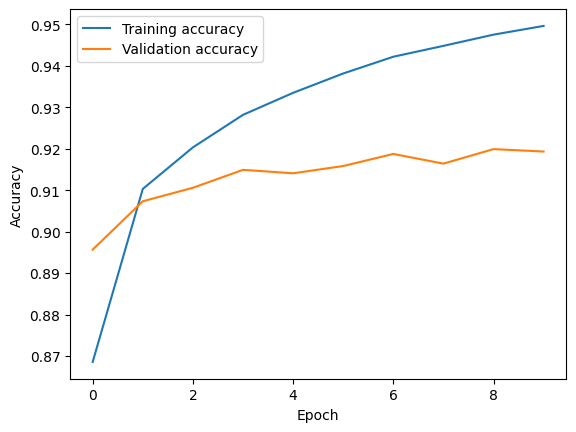

In [17]:
# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


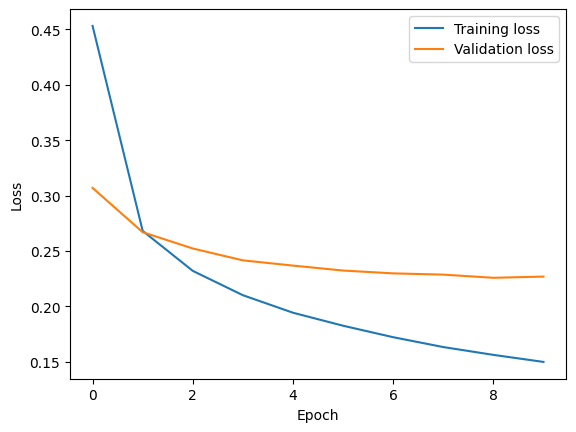

In [18]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
linear_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
hystory2=linear_model2.fit(dense_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3312 - accuracy: 0.9006 - val_loss: 0.2452 - val_accuracy: 0.9103
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1891 - accuracy: 0.9322 - val_loss: 0.2341 - val_accuracy: 0.9134
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1765 - accuracy: 0.9352 - val_loss: 0.2303 - val_accuracy: 0.9151
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1698 - accuracy: 0.9377 - val_loss: 0.2293 - val_accuracy: 0.9158
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1658 - accuracy: 0.9392 - val_loss: 0.2275 - val_accuracy: 0.9162
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1627 - accuracy: 0.9395 - val_loss: 0.2283 - val_accuracy: 0.9163
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1603 - accuracy: 0.9408 - val_loss: 0.2288 - val_accuracy: 0.9148
Epoch 

In [21]:
# valuta il modello sul set di test
score_dense = linear_model2.evaluate(dense_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_dense[1])


 Test accuracy of the linear model with conv2 input: 0.9383666515350342


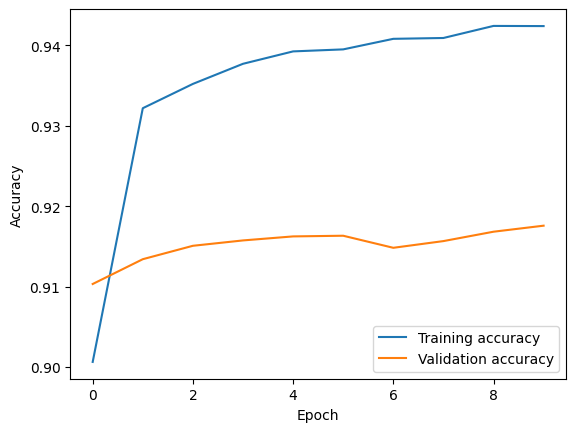

In [22]:
# Get training and validation accuracy
train_acc2 = hystory2.history['accuracy']
val_acc2 = hystory2.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc2, label='Training accuracy')
plt.plot(val_acc2, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()

## Feature Visualization Method

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


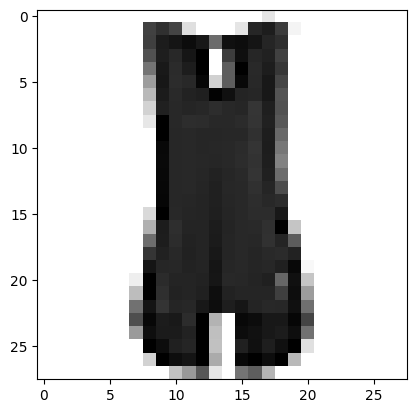

LABEL: T-shirt/top
conv1 (1, 28, 28, 64) 


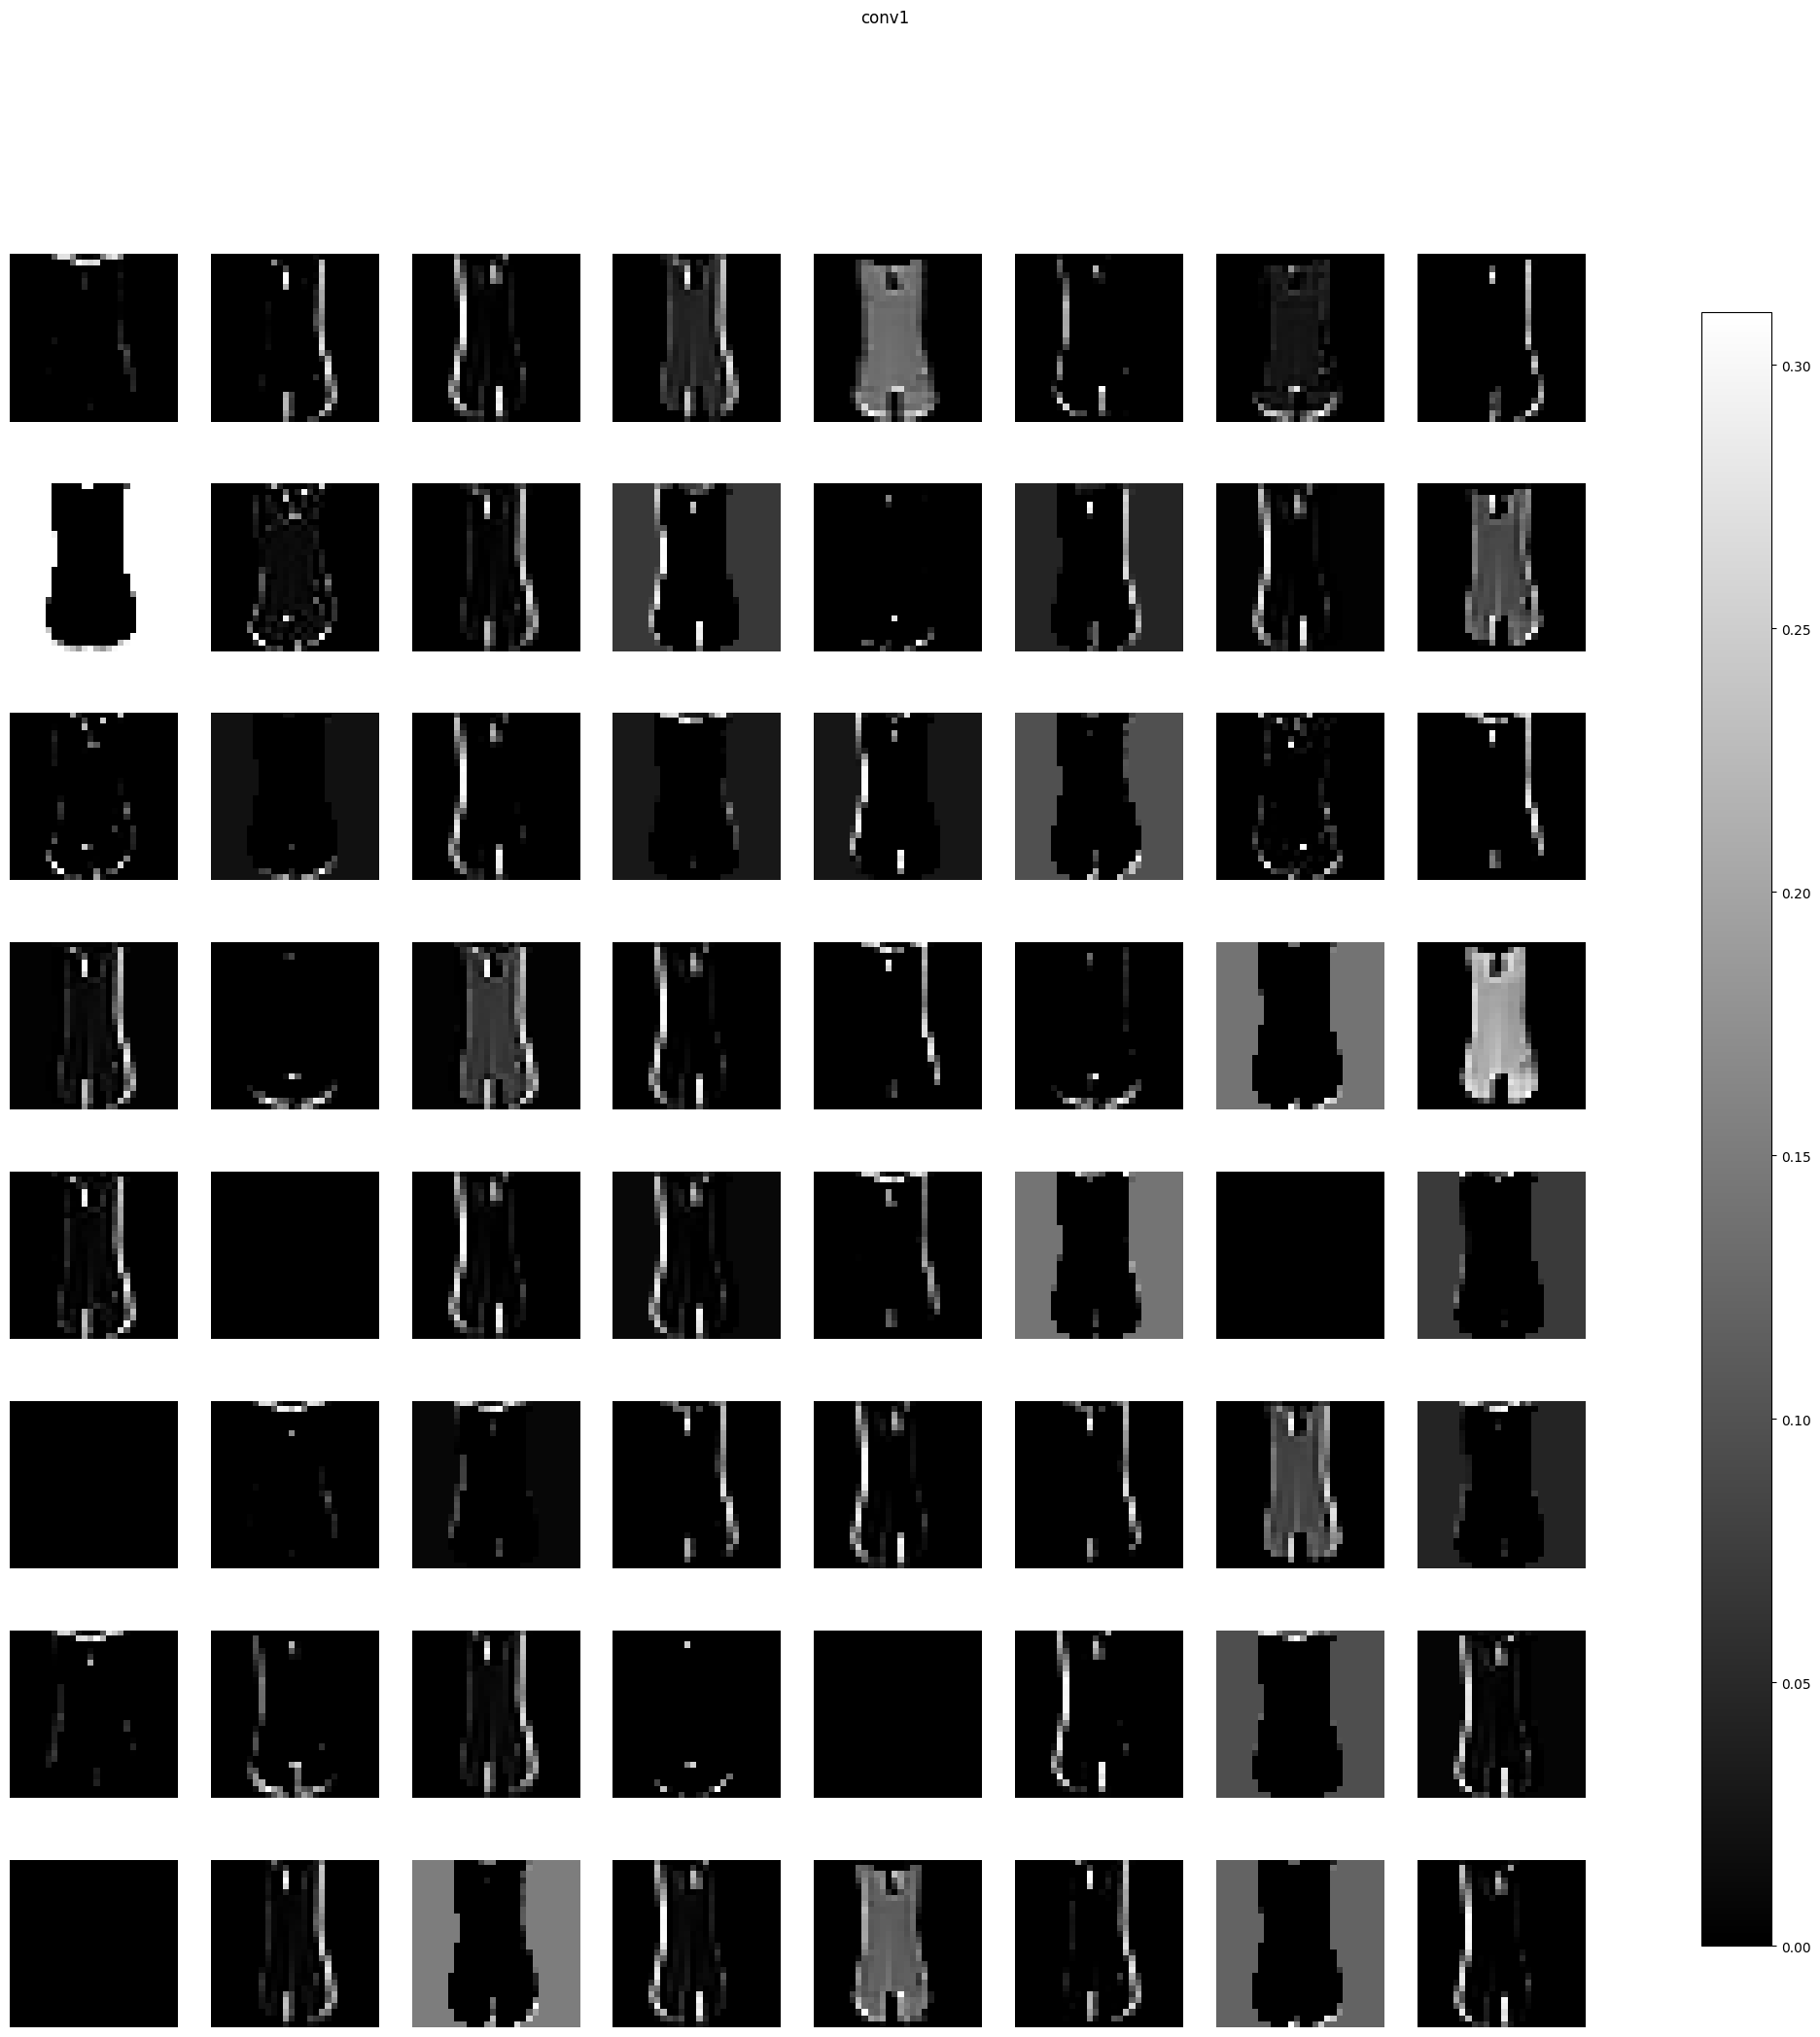

conv2 (1, 14, 14, 32) 


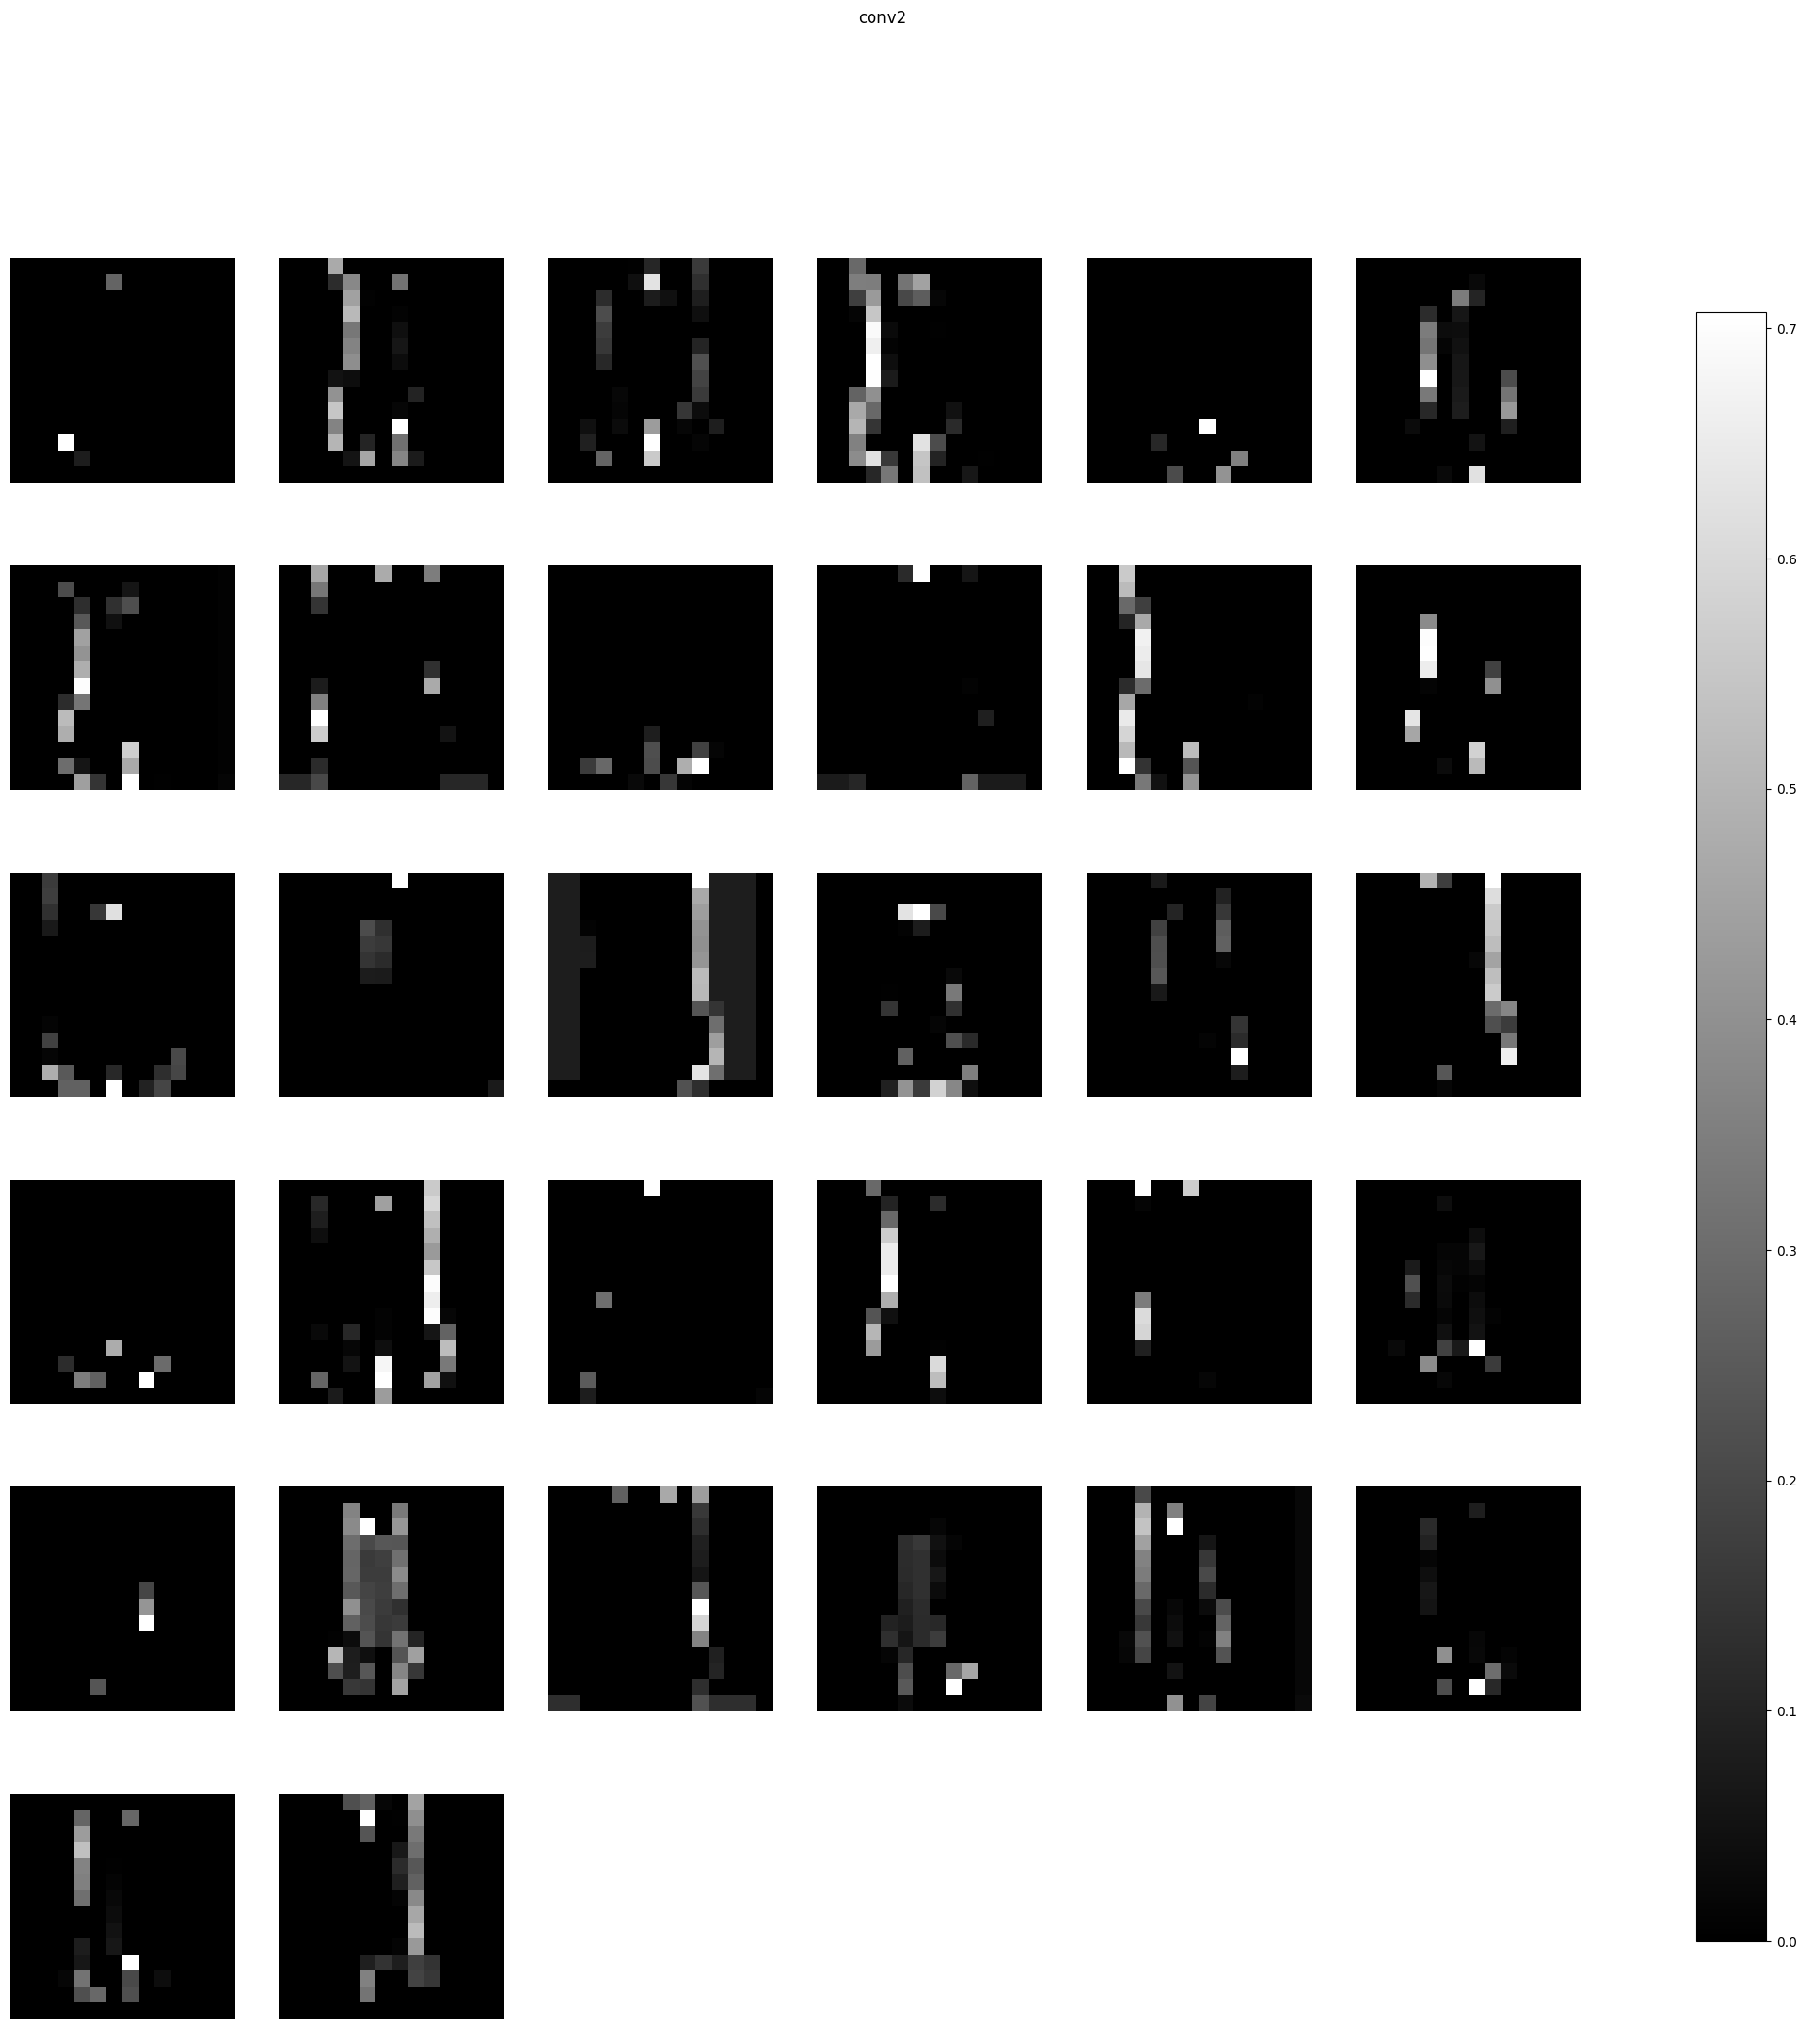

dense1 (1, 256) 


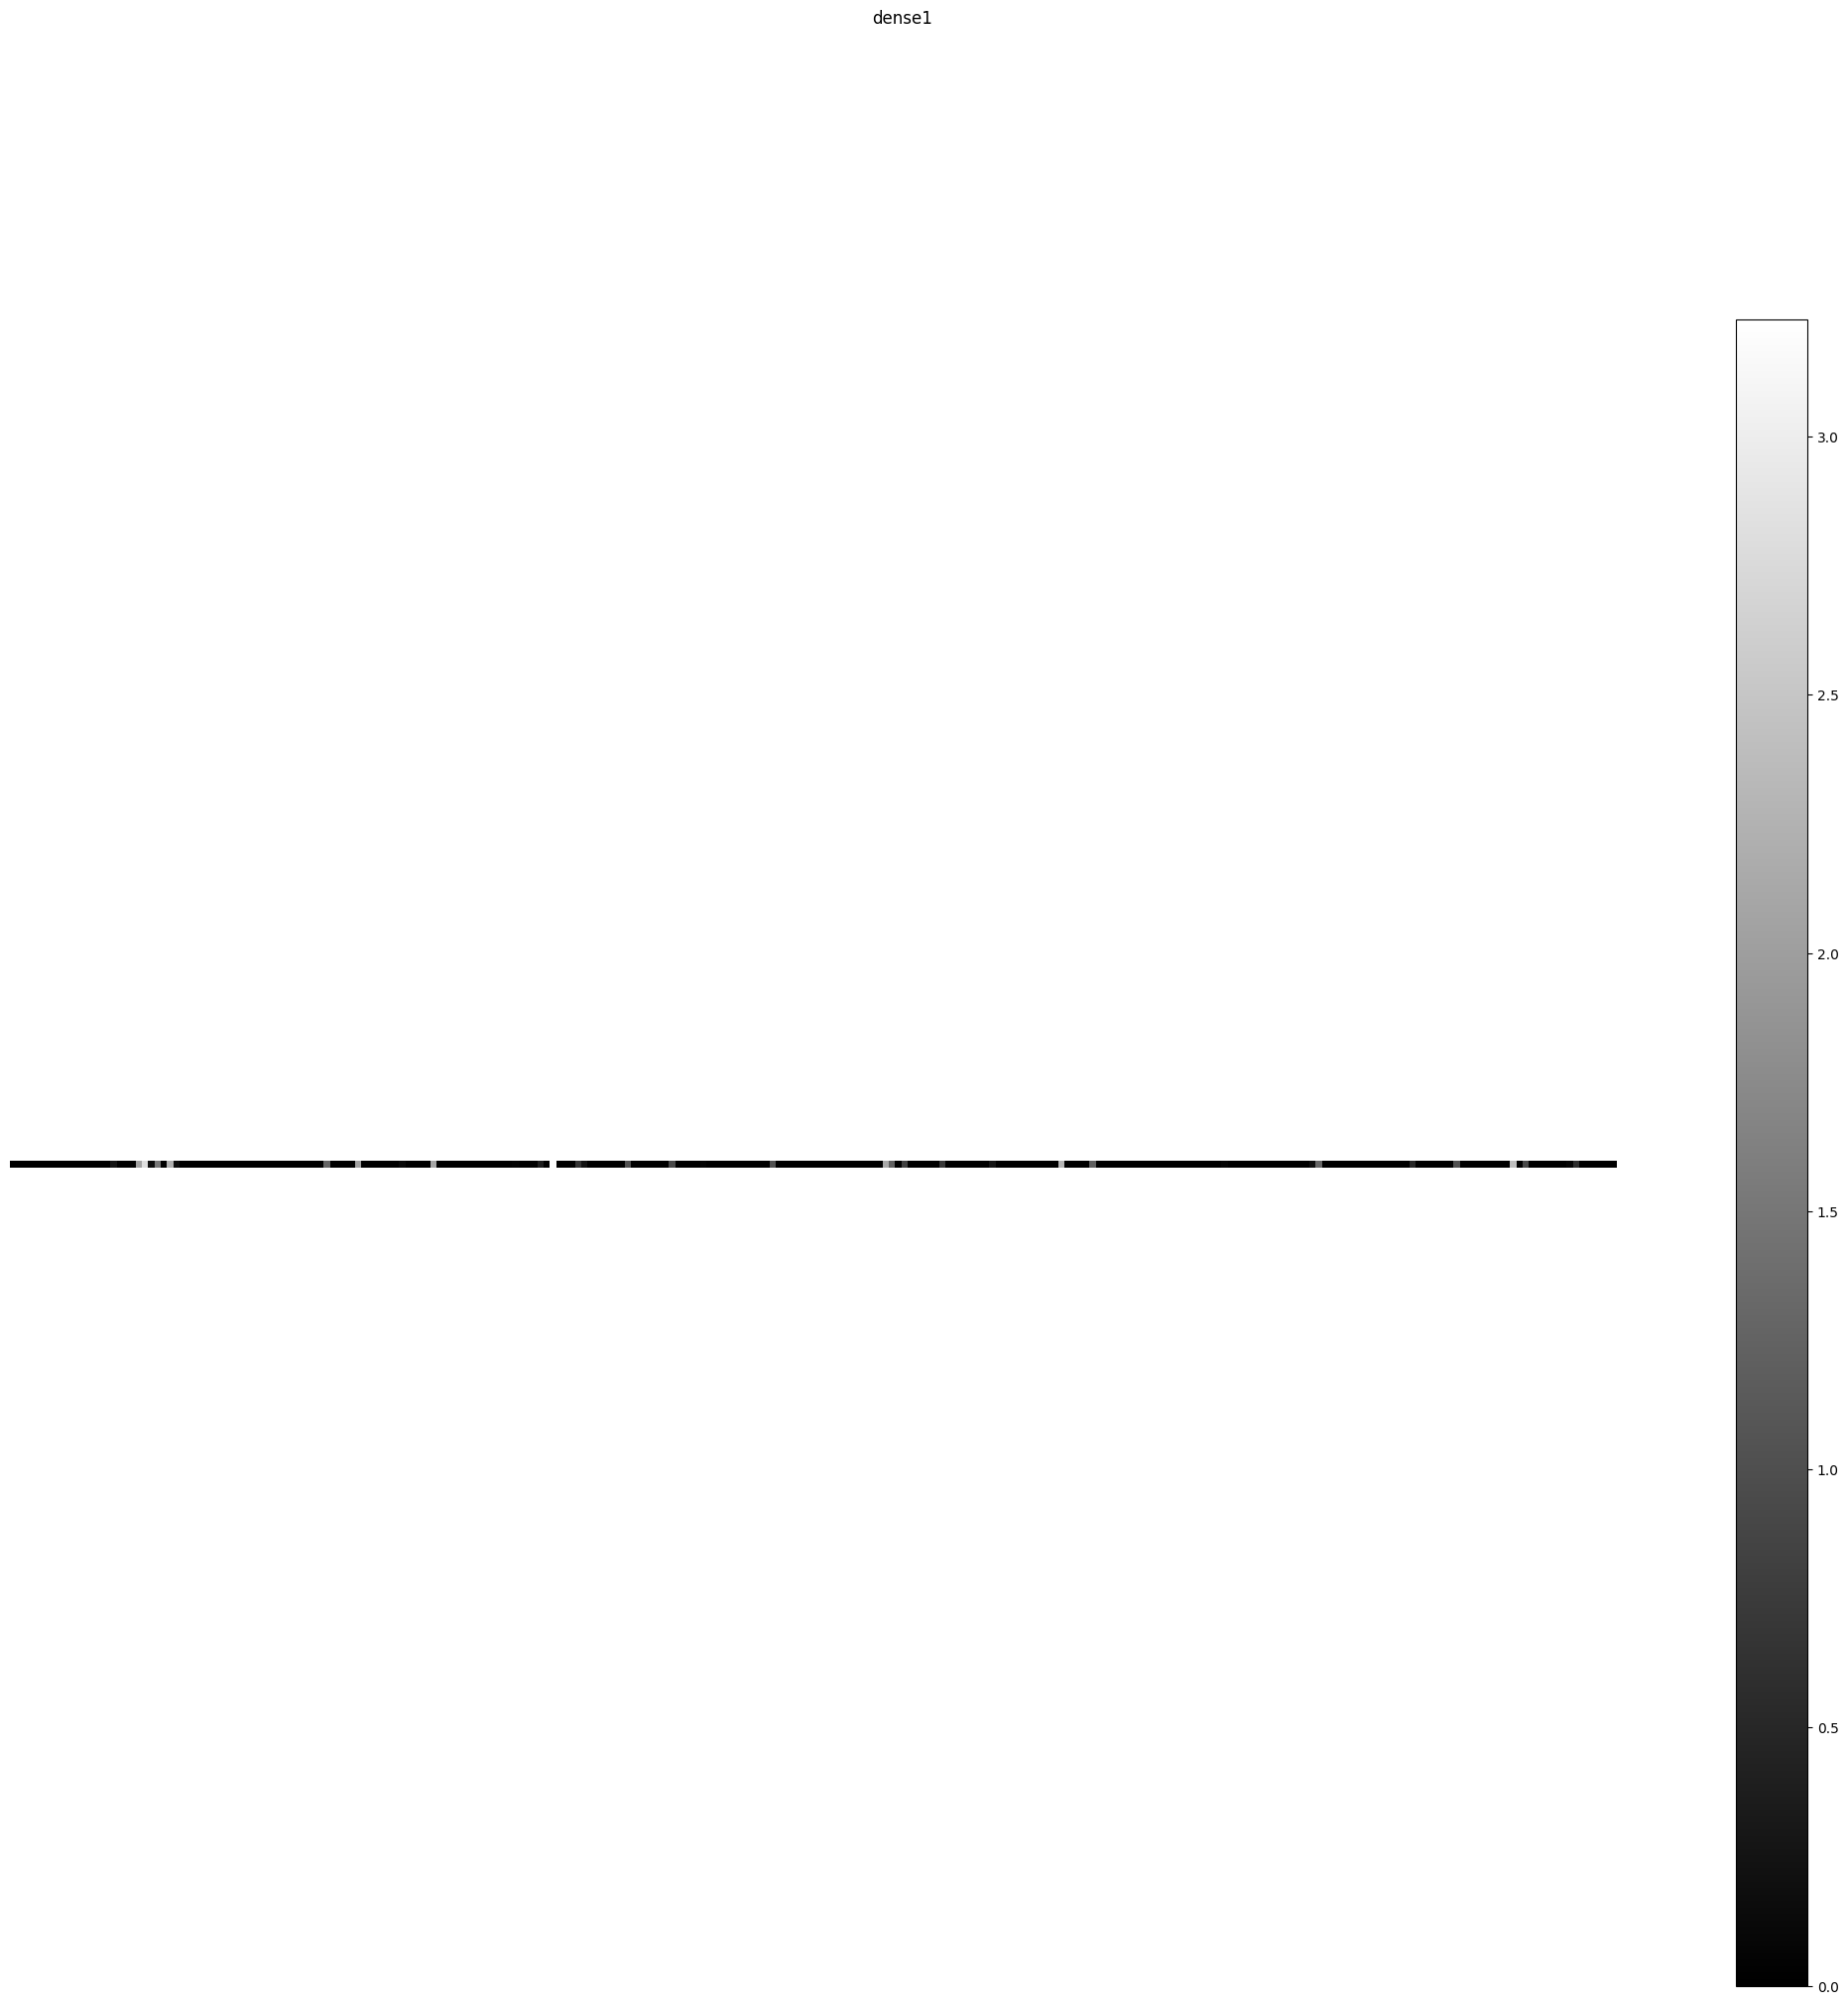

dense2 (1, 10) 


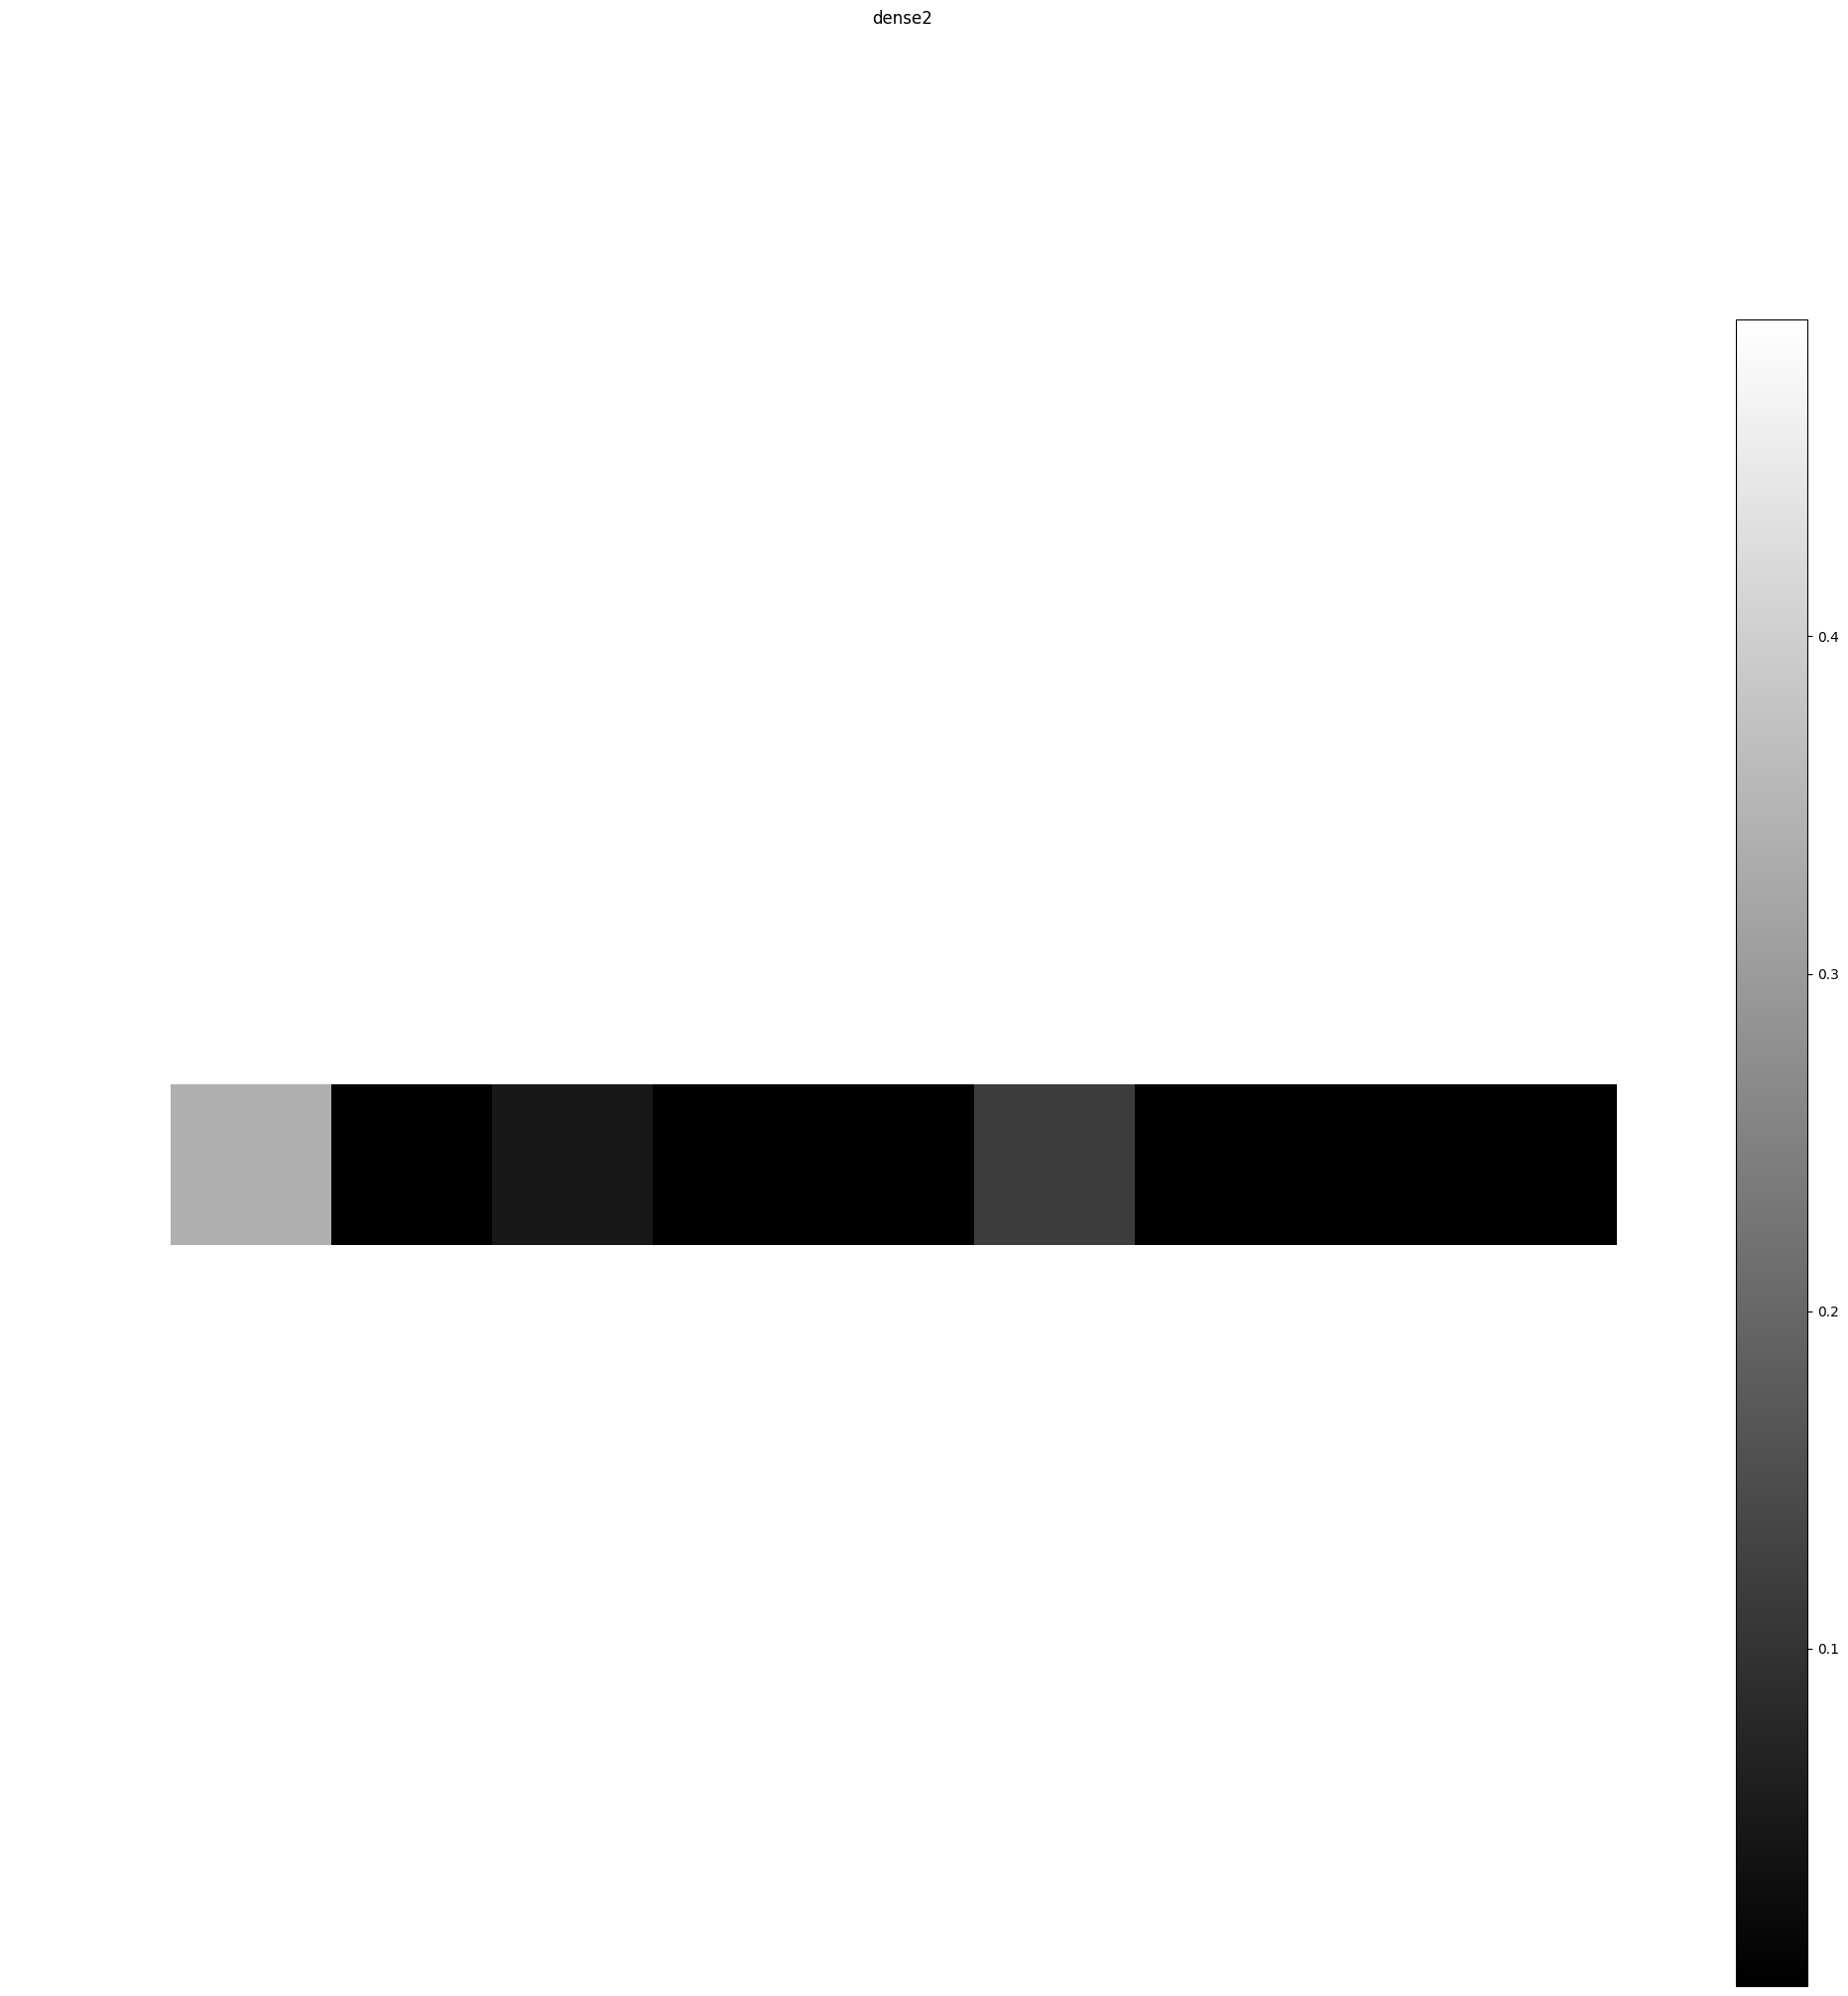

In [24]:
!pip install keract
from keract import get_activations, display_activations
layer_names=['conv1', 'conv2','dense1', 'dense2']
activations_cnn = get_activations(model, x_train[4:5], layer_names=layer_names)
#Plot the image and it's label
plt.imshow(x_train[4],cmap = plt.cm.gray_r,interpolation = "nearest")
plt.show()
print("LABEL: %s"%labels[np.argmax(y_train[4])])

#Plot the feature maps for each layer of the CNN
display_activations(activations_cnn, cmap='gray', save=False)

## Robustness to Gaussian noise


In [25]:
CNN_loss, CNN_acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy prima dell\'aggiunta di rumore: {:.2f}%'.format(CNN_acc * 100))

noise_factor = 0.2
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


CNN_noise_loss, CNN_noise_acc = model.evaluate(x_test_noisy, y_test, verbose=0)
print('Accuracy dopo l\'aggiunta di rumore: {:.2f}%'.format(CNN_noise_acc * 100))

Accuracy prima dell'aggiunta di rumore: 90.62%
Accuracy dopo l'aggiunta di rumore: 61.69%


In [26]:
y_pred_noisy = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


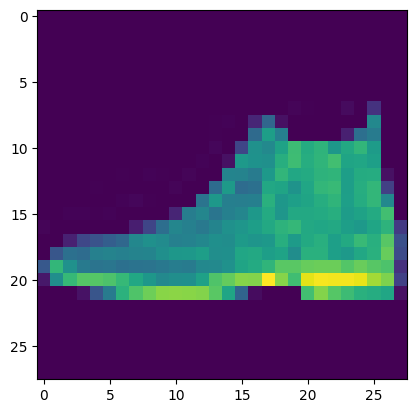

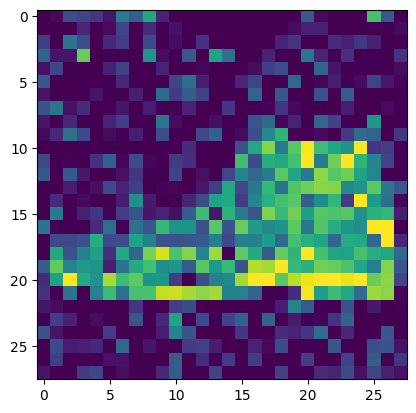

label originale Ankle Boot
label dopo noise Bag
label predetta dal modello originale Ankle Boot


In [27]:
plt.imshow(x_test[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
plt.imshow(x_test_noisy[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
print("label originale", labels[np.argmax(y_test[0])])
print("label dopo noise", labels[np.argmax(y_pred_noisy[0])])
print("label predetta dal modello originale", labels[np.argmax(y_pred[0])])

## Adversarial Attack

In [28]:
# Definisci la funzione per generare gli attacchi adversariali con il Fast Gradient Sign Method
def generate_adversarial_example(model, input_image, input_label, epsilon):
    # Imposta i gradienti calcolati sulla variabile di input
    input_image = tf.cast(input_image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(input_label, prediction)

    # Calcola i gradienti rispetto all'input
    gradient = tape.gradient(loss, input_image)

    # Applica il segno al gradiente e normalizzalo
    signed_grad = tf.sign(gradient)
    perturbation = epsilon * signed_grad

    # Applica la perturbazione all'immagine originale
    perturbed_image = input_image + perturbation
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)

    return perturbed_image

In [29]:
def plot_adversarial_image(x_adv):
  fig, axs = plt.subplots(1, 2)
  axs[0].imshow(x.squeeze(), cmap='viridis')
  axs[0].set_title('Original Example')
  axs[1].imshow(x_adv.numpy().squeeze(), cmap='viridis')
  axs[1].set_title('Adversarial Example')
  plt.show()

  y_pred = model.predict(x)
  y_pred_adv = model.predict(x_adv)

  print('True Label:', labels[y_true])
  print('Predicted label:', labels[np.argmax(y_pred)])
  print('Predicted label after adversarial attack:', labels[np.argmax(y_pred_adv)])

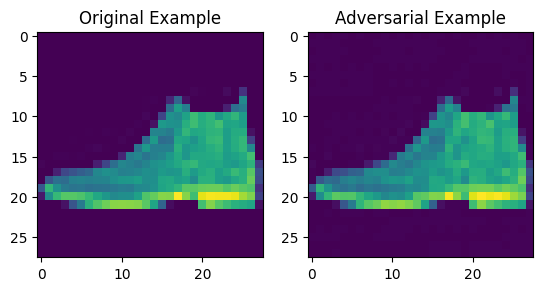

1/1 [==============================] - 0s 18ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot


In [30]:
x = x_test[0]
x = x.reshape(1, 28, 28, 1)
y_true = np.argmax(y_test[0])

# Genera un attacco adversariale con il Fast Gradient Sign Method
epsilon = 0.01
x_adv = generate_adversarial_example(model, x, y_true, epsilon)

# Mostra l'immagine originale e quella perturbata
plot_adversarial_image(x_adv)

0.02


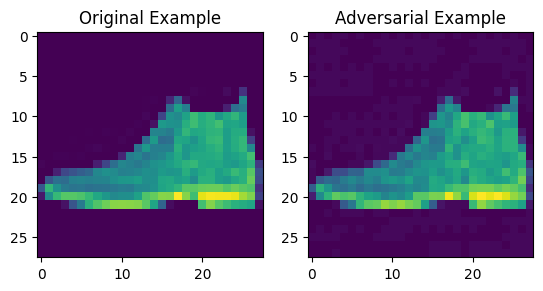

1/1 [==============================] - 0s 21ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.03


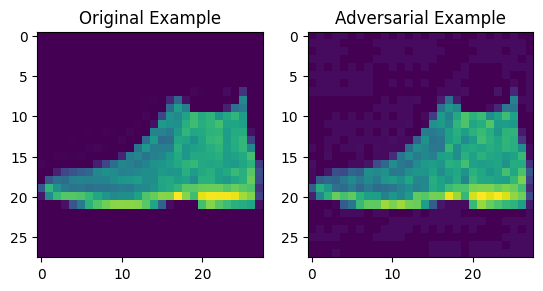

1/1 [==============================] - 0s 25ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.04


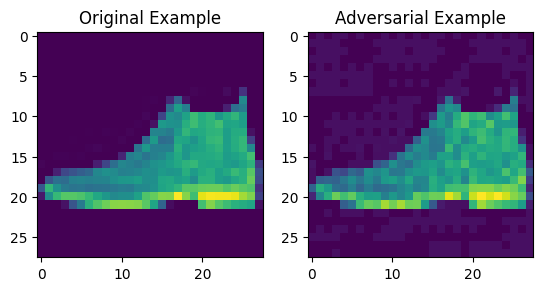

1/1 [==============================] - 0s 18ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.05


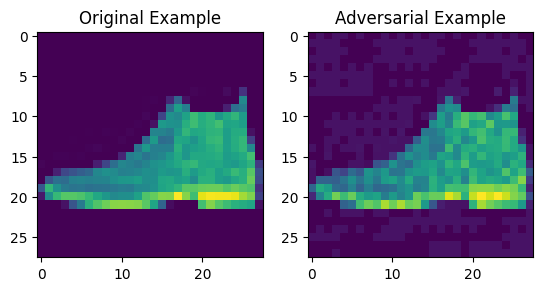

1/1 [==============================] - 0s 21ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Ankle Boot
0.06


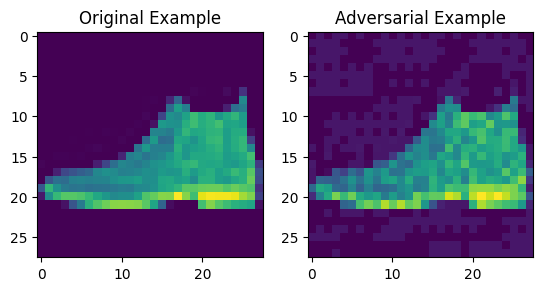

1/1 [==============================] - 0s 18ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.07


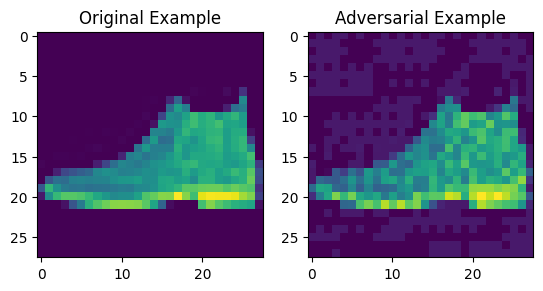

1/1 [==============================] - 0s 21ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.08


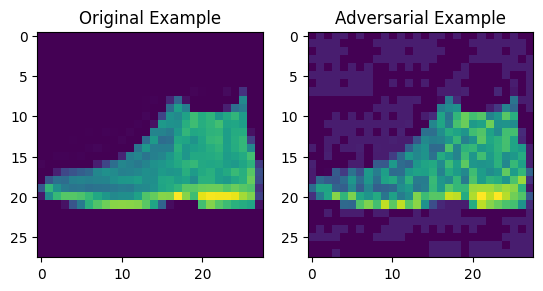

1/1 [==============================] - 0s 19ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.09


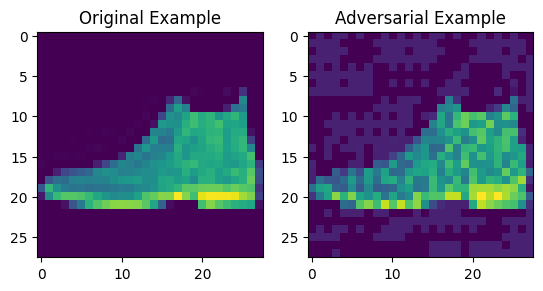

1/1 [==============================] - 0s 19ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker
0.1


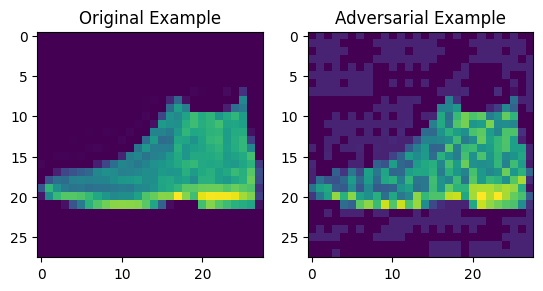

1/1 [==============================] - 0s 33ms/step
True Label: Ankle Boot
Predicted label: Ankle Boot
Predicted label after adversarial attack: Sneaker


In [31]:
epsilons = [0.02, 0.03, 0.04, 0.05,0.06,0.07,0.08,0.09,0.1]

for i in epsilons:
  x_adv = generate_adversarial_example(model, x, y_true, i)
  print(i)
  plot_adversarial_image(x_adv)

## CAE—Convolutional Autoencoder

In [32]:
# Encoder
encoder_input = tf.keras.layers.Input(shape=(28,28,1))
encoder_conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', name='encoder_conv1')(encoder_input)
encoder_maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=2, name='encoder_maxpool1')(encoder_conv1)
encoder_dropout1 = tf.keras.layers.Dropout(0.3, name='encoder_dropout1')(encoder_maxpool1)
encoder_conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='encoder_conv2')(encoder_dropout1)
encoder_maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=2, name='encoder_maxpool2')(encoder_conv2)
encoder_dropout2 = tf.keras.layers.Dropout(0.3, name='encoder_dropout2')(encoder_maxpool2)

# Decoder
decoder_conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='decoder_conv1')(encoder_dropout2)
decoder_upsample1 = tf.keras.layers.UpSampling2D(size=(2,2), name='decoder_upsample1')(decoder_conv1)
decoder_dropout1 = tf.keras.layers.Dropout(0.3, name='decoder_dropout1')(decoder_upsample1)
decoder_conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', name='decoder_conv2')(decoder_dropout1)
decoder_upsample2 = tf.keras.layers.UpSampling2D(size=(2,2), name='decoder_upsample2')(decoder_conv2)
decoder_dropout2 = tf.keras.layers.Dropout(0.3, name='decoder_dropout2')(decoder_upsample2)
decoder_output = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', activation='sigmoid', name='decoder_output')(decoder_dropout2)

# Autoencoder
autoencoder = tf.keras.Model(inputs=encoder_input, outputs=decoder_output, name='autoencoder')
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv1 (Conv2D)      (None, 28, 28, 64)        320       
                                                                 
 encoder_maxpool1 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 encoder_dropout1 (Dropout)  (None, 14, 14, 64)        0         
                                                                 
 encoder_conv2 (Conv2D)      (None, 14, 14, 32)        8224      
                                                                 
 encoder_maxpool2 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                  

In [33]:
noise_level = 0.3

#Insert noise in the training set
x_train_noisy = x_train + noise_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)


#Force the pixel value to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)


In [34]:
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder_results=autoencoder.fit(x_train_noisy, x_train, batch_size=32, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 18s 12ms/step - loss: 0.0340 - val_loss: 0.0231
Epoch 2/30
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0260 - val_loss: 0.0208
Epoch 3/30
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0246 - val_loss: 0.0197
Epoch 4/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0239 - val_loss: 0.0195
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0234 - val_loss: 0.0187
Epoch 6/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0231 - val_loss: 0.0184
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0229 - val_loss: 0.0183
Epoch 8/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0228 - val_loss: 0.0183
Epoch 9/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0227 - val_loss: 0.0183
Epoch 10/30
1313/1313 [==============================] - 9s 7ms/step - los

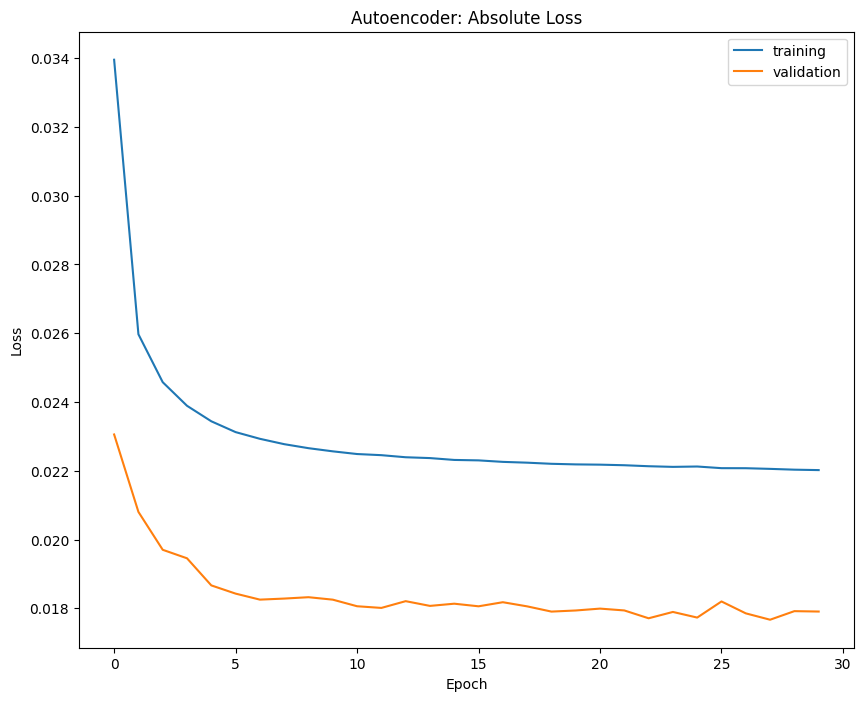

In [35]:
#Store the loss of the training and validation set
training_loss = autoencoder_results.history['loss']
validation_loss = autoencoder_results.history['val_loss']

#Loss history for training and validation
plt.figure(figsize=(10, 8))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Autoencoder: Absolute Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 2ms/step


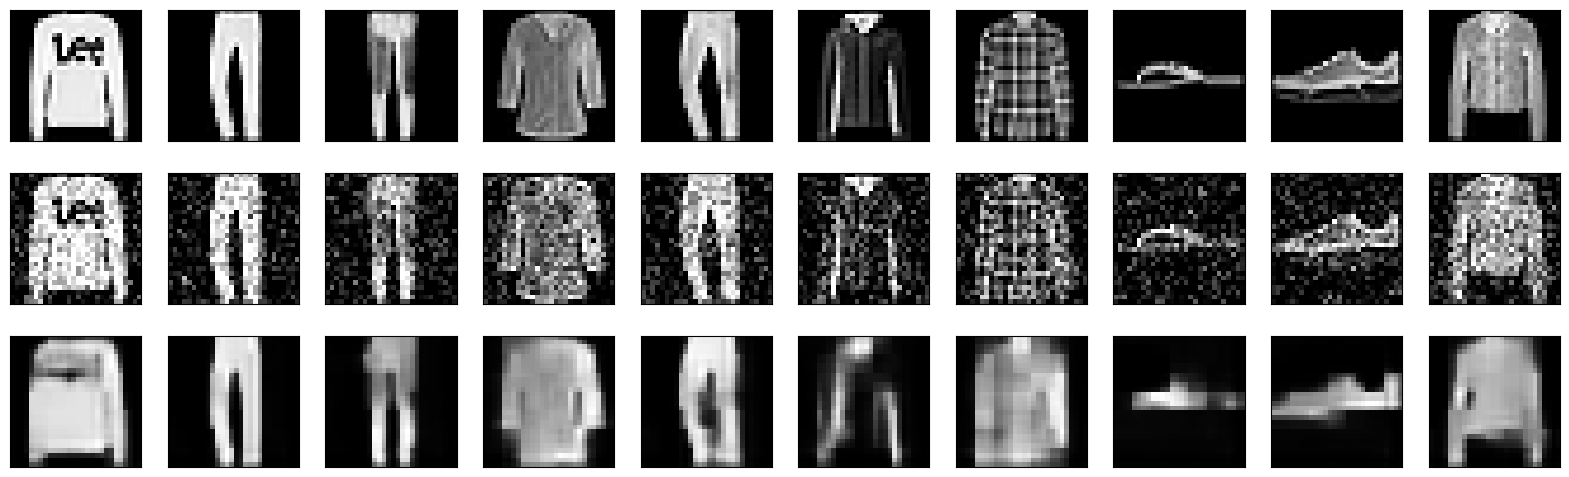

In [36]:
#Perform prediction on the noisy test data 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display Original images
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display perturbed images
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + (2*n))
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [37]:
print('Accuracy prima dell\'aggiunta di rumore: {:.2f}%'.format(CNN_acc * 100))
print('Accuracy dopo l\'aggiunta di rumore: {:.2f}%'.format(CNN_noise_acc * 100))
autoenc_loss, autoenc_acc = model.evaluate(decoded_imgs, y_test, verbose=0)
print('Accuracy dell\'autoencoder: {:.2f}%'.format(autoenc_acc * 100))

Accuracy prima dell'aggiunta di rumore: 90.62%
Accuracy dopo l'aggiunta di rumore: 61.69%
Accuracy dell'autoencoder: 67.49%
